# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

Dataset ini berisi data tentang kualitas air dan bertujuan untuk memprediksi apakah sampel air tertentu aman untuk dikonsumsi manusia (potable) atau tidak, berdasarkan beberapa parameter fisik dan kimia. Dataset ini sangat berguna untuk analisis kualitas air dan pengembangan model klasifikasi.

Fitur-fitur (Variabel) dalam Dataset:

- ph: Mengukur keasaman atau alkalinitas air. Kisaran pH air minum yang direkomendasikan adalah 6.5 hingga 8.5.
- Hardness (Kekerasan): Kapasitas air untuk mengendapkan sabun. Hal ini disebabkan oleh ion logam multivalent terlarut, yang paling umum adalah kalsium dan magnesium.
- Solids (Padatan Terlarut): Mengukur jumlah total padatan terlarut dalam air, yang dapat mempengaruhi rasa, bau, dan warna air.
- Chloramines (Kloramin): Disinfektan yang digunakan dalam pengolahan air minum untuk membunuh bakteri dan virus. Tingkat kloramin yang terlalu tinggi bisa berbahaya.
- Sulfate (Sulfat): Zat alami yang ditemukan di formasi batuan. Tingkat sulfat yang tinggi dapat menyebabkan efek pencahar dan bau/rasa yang tidak enak.
- Conductivity (Konduktivitas): Mengukur kemampuan air untuk melewatkan arus listrik. Ini adalah indikator konsentrasi ion terlarut dalam air.
- Organic_carbon (Karbon Organik): Mengukur total karbon organik yang ada dalam air, yang berasal dari dekomposisi bahan organik alami.
- Trihalomethanes (THMs): Senyawa kimia yang terbentuk sebagai produk sampingan ketika klorin atau disinfektan lain ditambahkan ke air yang mengandung bahan organik. Paparan jangka panjang terhadap THMs dapat memiliki risiko kesehatan.
- Turbidity (Kekeruhan): Mengukur tingkat kekeruhan air karena partikel tersuspensi. Air yang keruh dapat menunjukkan adanya patogen.
- Potability (Portabilitas): Ini adalah variabel target (label). Nilai 1 menunjukkan bahwa air aman untuk diminum, sedangkan 0 menunjukkan bahwa air tidak aman untuk diminum.

Dataset ini memungkinkan eksplorasi bagaimana masing-masing parameter kualitas air ini berkontribusi terhadap keamanan air minum.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('/content/water_potability.csv')

# Menampilkan 5 baris data
print("5 baris awal dataset:")
print(df.head())

print("\nDataset Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

5 baris awal dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column    

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


--- Distribusi Variabel Target (Potability) ---


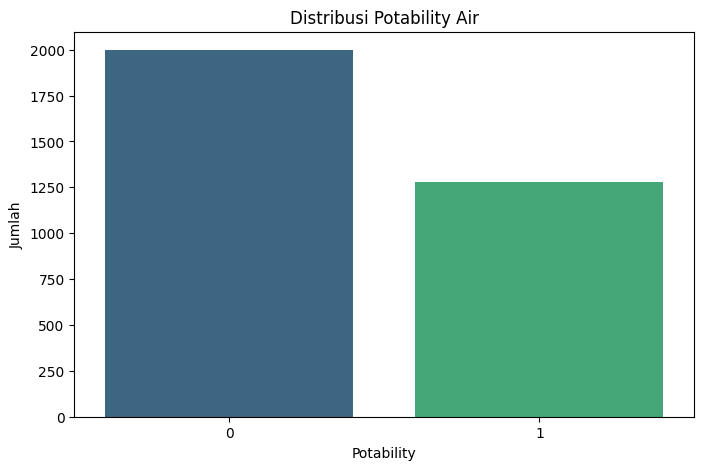


--- Korelasi Antar Fitur Numerik ---


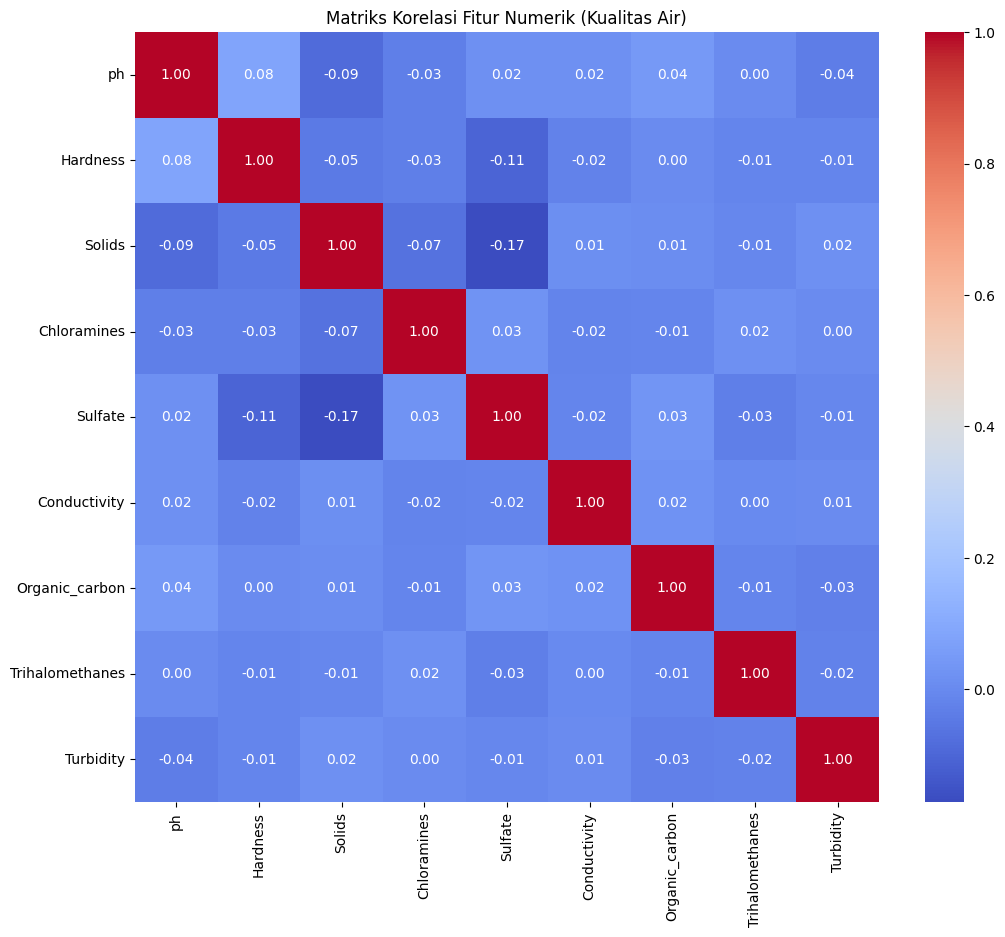


--- Distribusi Setiap Fitur Numerik ---


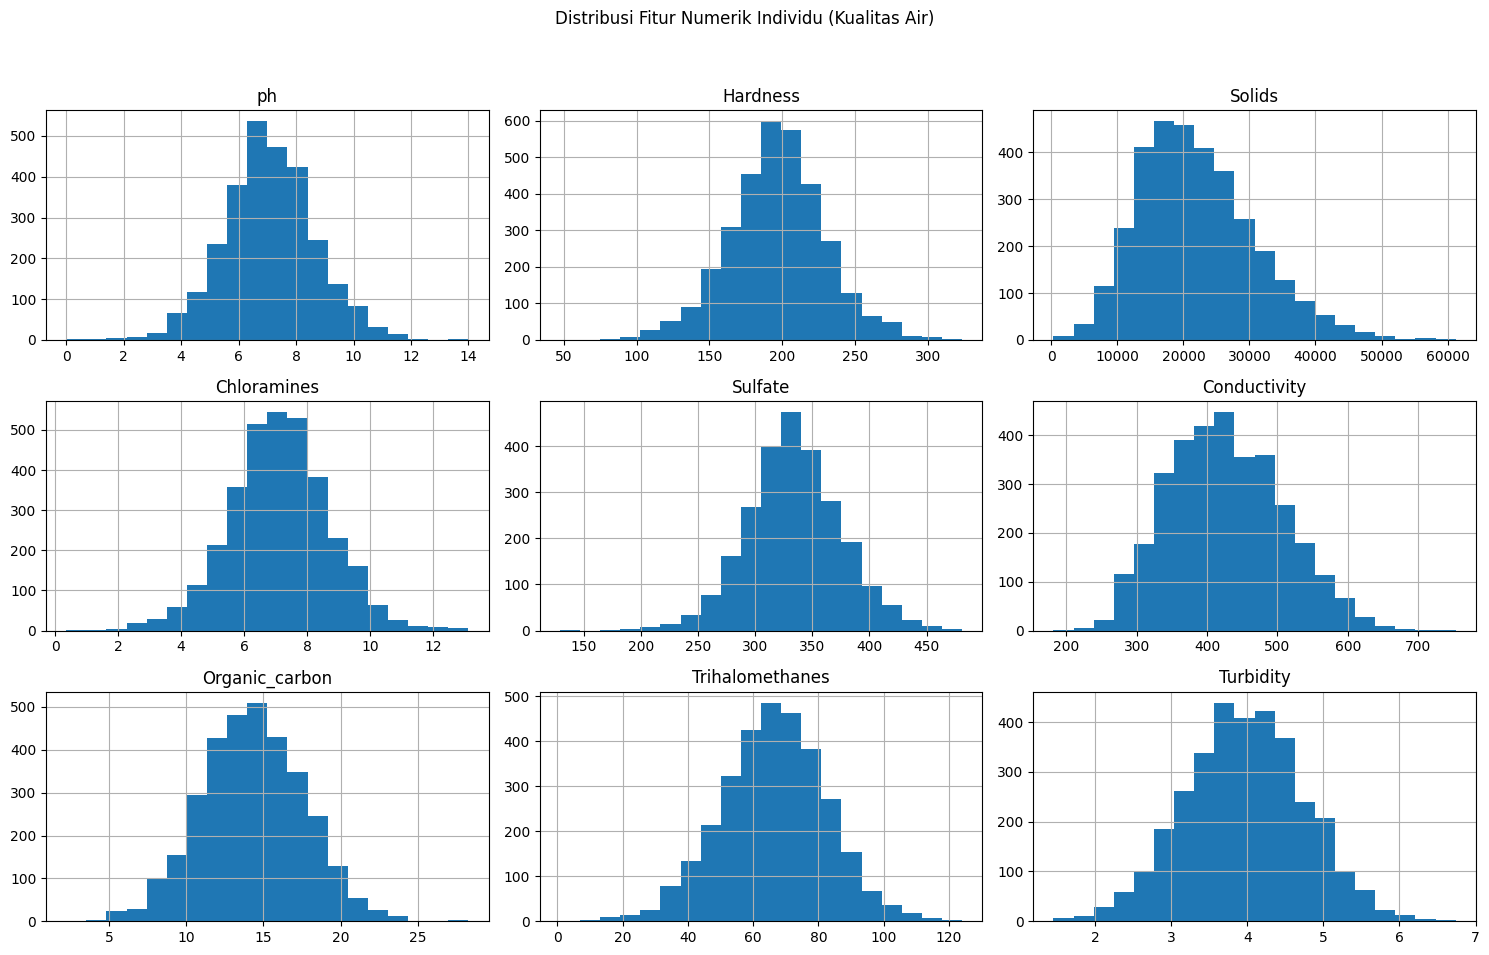

In [4]:
print("\n--- Distribusi Variabel Target (Potability) ---")
plt.figure(figsize=(8, 5))
sns.countplot(x='Potability', data=df, palette='viridis', hue='Potability', legend=False)
plt.title('Distribusi Potability Air')
plt.xlabel('Potability')
plt.ylabel('Jumlah')
plt.show()

print("\n--- Korelasi Antar Fitur Numerik ---")
# Menghitung korelasi hanya untuk fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('Potability', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur Numerik (Kualitas Air)')
plt.show()

print("\n--- Distribusi Setiap Fitur Numerik ---")
# Menampilkan histogram hanya untuk fitur numerik
df.drop('Potability', axis=1).hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Numerik Individu (Kualitas Air)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
print("Jumlah nilai yang hilang per kolom sebelum penanganan:")
print(df.isnull().sum())

# Mengisi nilai yang hilang dengan mean untuk kolom numerik 'ph', 'Sulfate', 'Trihalomethanes'
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

print("\nJumlah nilai yang hilang per kolom setelah penanganan:")
print(df.isnull().sum())

Jumlah nilai yang hilang per kolom sebelum penanganan:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Jumlah nilai yang hilang per kolom setelah penanganan:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [6]:
print("Jumlah baris duplikat sebelum penghapusan:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Jumlah baris duplikat setelah penghapusan:", df.duplicated().sum())


Jumlah baris duplikat sebelum penghapusan: 0
Jumlah baris duplikat setelah penghapusan: 0


In [7]:
print("\n--- Penanganan Outlier menggunakan IQR ---")
outlier_count = {}

for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count[column] = len(outliers)

        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for column, count in outlier_count.items():
    print(f"Jumlah outlier yang ditangani di kolom '{column}': {count}")

print("\nDataset setelah penanganan outlier:")
print(df.describe())


--- Penanganan Outlier menggunakan IQR ---
Jumlah outlier yang ditangani di kolom 'ph': 142
Jumlah outlier yang ditangani di kolom 'Hardness': 83
Jumlah outlier yang ditangani di kolom 'Solids': 47
Jumlah outlier yang ditangani di kolom 'Chloramines': 61
Jumlah outlier yang ditangani di kolom 'Sulfate': 264
Jumlah outlier yang ditangani di kolom 'Conductivity': 11
Jumlah outlier yang ditangani di kolom 'Organic_carbon': 25
Jumlah outlier yang ditangani di kolom 'Trihalomethanes': 54
Jumlah outlier yang ditangani di kolom 'Turbidity': 19
Jumlah outlier yang ditangani di kolom 'Potability': 0

Dataset setelah penanganan outlier:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.079949   196.392423  21957.112200     7.121794   333.788678   
std       1.381951    32.017189   8592.820397     1.544126    31.768004   
min       3.889107   117.125160    320.942611     3.146221   267